In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# fix random seed for reproducibility
np.random.seed(7)

In [87]:
gear2Path = os.path.normpath('Gear2')
gear3Path = os.path.normpath('Gear3')
gear4Path = os.path.normpath('Gear4')
doublePath = os.path.normpath('Double')
pathList = [gear2Path,gear3Path,gear4Path,doublePath]
classDict = {'Gear2':0,'Gear3':1,'Gear4':2,'Double':3}
dataListR = []
label = pd.DataFrame()

for p in pathList:
    pPath = os.path.normpath('/Users/mariekorneliusson/documents/AiSports/skate_without_video') + '/' + p
    dirs = os.listdir(pPath)
    for i in range(len(dirs)):
        tempP = pPath + '/' + dirs[i]
        d = pd.read_csv(tempP,low_memory = False)
        label = pd.DataFrame({'label': classDict[p]*np.ones(len(d),)})
        d = d.join(label)
        dataListR.append(d)
        
dataOrder = np.random.choice(len(dataListR), size=len(dataListR), replace=False)
skiDataRandom = pd.DataFrame()

addT = 0
for i in dataOrder:
    dataListR[i].t = dataListR[i].t + addT
    addT = dataListR[i].t[len(dataListR[i].t) -1] + 0.02
    skiDataRandom = skiDataRandom.append(dataListR[i])

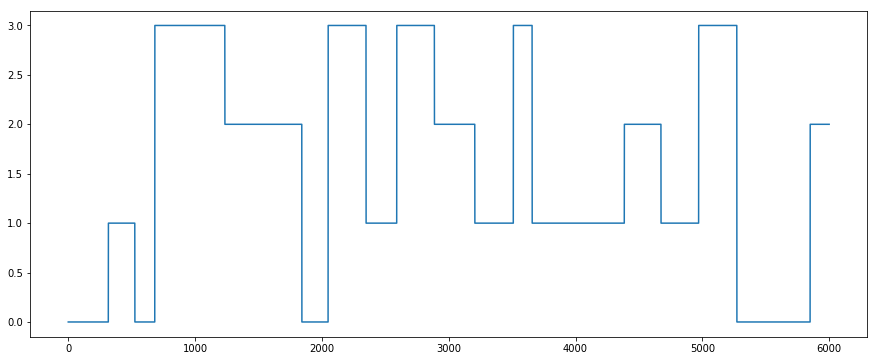

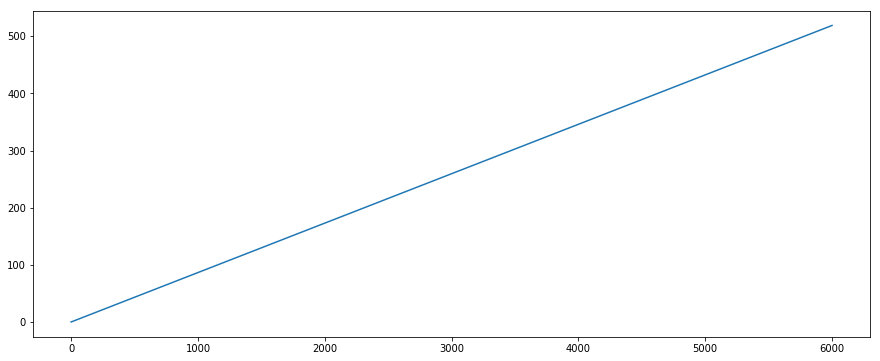

In [3]:
time = np.linspace(0,6000,len(skiDataRandom.t))
plt.figure(0,figsize=(15, 6))
plt.plot(time,skiDataRandom.label)
plt.figure(1,figsize=(15, 6))
plt.plot(time,skiDataRandom.t)

Text(0.5,1,'Time seris of force in the right pole')

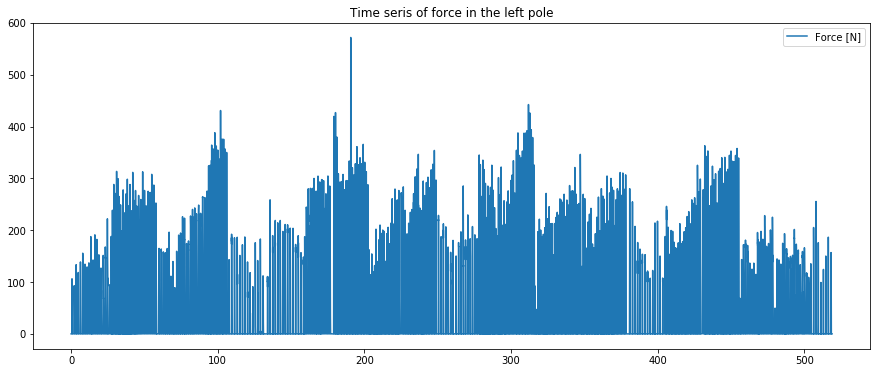

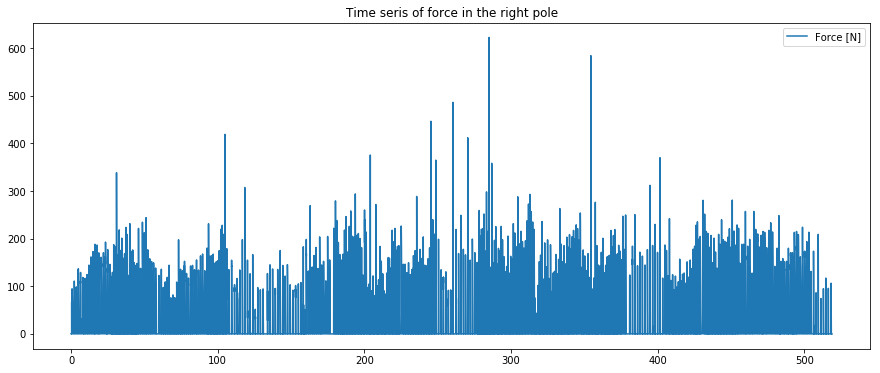

In [4]:
plt.figure(0,figsize=(15, 6))
plt.plot(skiDataRandom.t,skiDataRandom.fL,label='Force [N]')
plt.legend()
plt.title('Time seris of force in the left pole')
plt.figure(1,figsize=(15, 6))
plt.plot(skiDataRandom.t,skiDataRandom.fR,label='Force [N]')
plt.legend()
plt.title('Time seris of force in the right pole')

In [5]:
X = skiDataRandom.loc[:,'fL':'a3R'].values
Y = pd.get_dummies(skiDataRandom['label']).values

In [6]:
nbrSamples = X.shape[0]
dataDimX = X.shape[1]
timesteps = 1
nbrOfClasses = 4
X = X.reshape(nbrSamples,timesteps,dataDimX)
Y = Y.reshape(nbrSamples,timesteps,nbrOfClasses)
trainX = X
trainY = Y

In [7]:
model = Sequential()
model.add(LSTM(20,return_sequences=True,input_shape=(timesteps, dataDimX)))
model.add(Dense(nbrOfClasses, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [8]:
historyFirstModel = model.fit(trainX, trainY, epochs=20, batch_size=100, validation_split=0)

Epoch 1/20
25950/25950 [==============================] - 3s 105us/step - loss: 1.2429 - categorical_accuracy: 0.4262
Epoch 2/20
25950/25950 [==============================] - 1s 49us/step - loss: 1.0324 - categorical_accuracy: 0.5644
Epoch 3/20
25950/25950 [==============================] - 1s 49us/step - loss: 0.8912 - categorical_accuracy: 0.6326
Epoch 4/20
25950/25950 [==============================] - 1s 47us/step - loss: 0.7933 - categorical_accuracy: 0.6825
Epoch 5/20
25950/25950 [==============================] - 1s 46us/step - loss: 0.7234 - categorical_accuracy: 0.7135
Epoch 6/20
25950/25950 [==============================] - 1s 43us/step - loss: 0.6697 - categorical_accuracy: 0.7412
Epoch 7/20
25950/25950 [==============================] - 1s 53us/step - loss: 0.6281 - categorical_accuracy: 0.7580
Epoch 8/20
25950/25950 [==============================] - 1s 47us/step - loss: 0.5963 - categorical_accuracy: 0.7703
Epoch 9/20
25950/25950 [==============================] - 1s 50

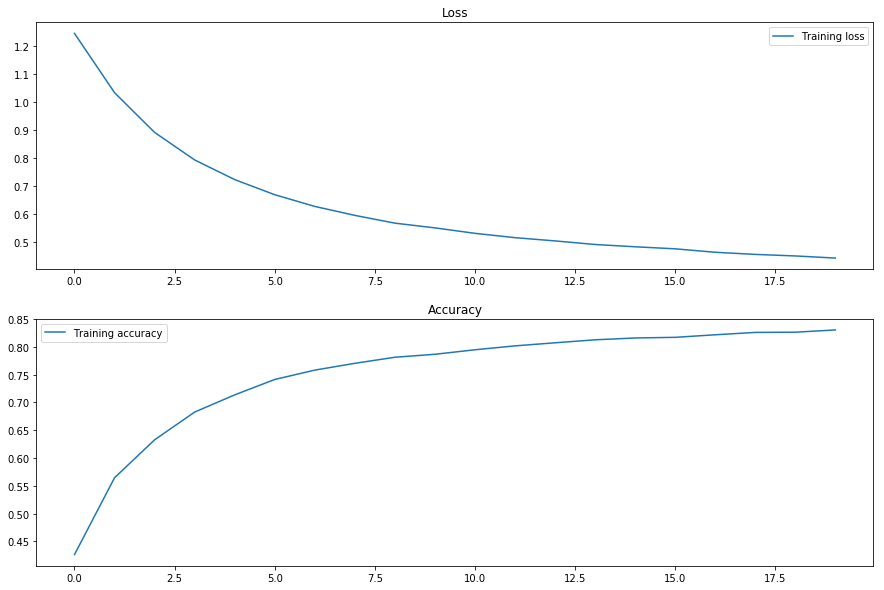

In [9]:
plt.figure(0,figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(historyFirstModel.history['loss'],label = 'Training loss')
#plt.plot(historyFirstModel.history['val_loss'],label = 'Validation loss')
plt.title('Loss')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(historyFirstModel.history['categorical_accuracy'],label = 'Training accuracy')
#plt.plot(historyFirstModel.history['val_categorical_accuracy'],label = 'Validation accuracy')
plt.title('Accuracy')
plt.legend()

In [12]:
# Use training data for predictions 

predY = model.predict(trainX)

yTestClass = np.argmax(trainY, axis=2)
yPredClass = np.argmax(predY, axis=2)


acc = accuracy_score(yTestClass, yPredClass)
print("Accuracy: %.2f" % acc)


(25950, 1)
Accuracy: 0.83


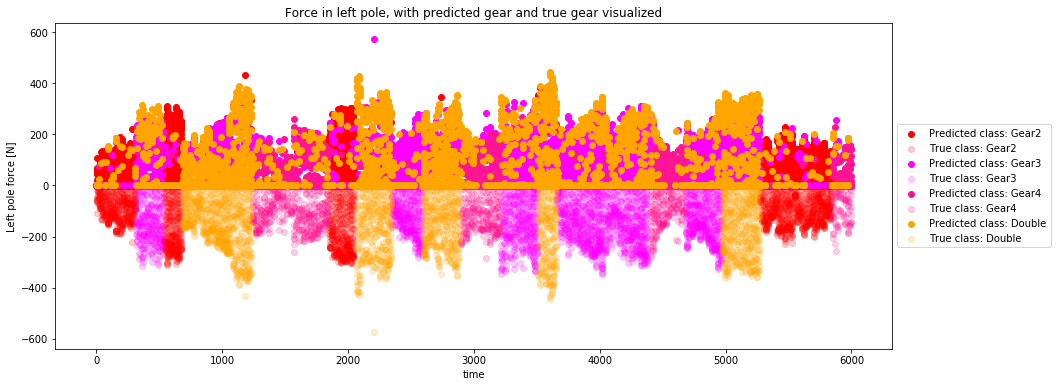

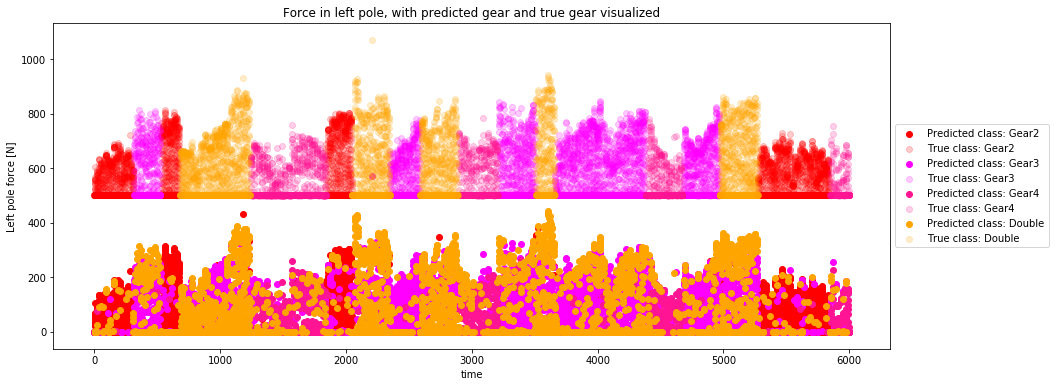

In [82]:
colorDict = {0:'r',1:'fuchsia',2:'deeppink',3:'orange'}
Xplot = X.reshape(nbrSamples,dataDimX)
    
plt.figure(0,figsize=(15, 6))
for c in classDict.keys():
    indClass = np.where(yPredClass == classDict[c])[0][:]
    indCTrue = np.where(yTestClass == classDict[c])[0][:]
    plt.scatter(time[indClass],Xplot[indClass,0],label = 'Predicted class: ' + c,color =  colorDict[classDict[c]], alpha = 1)
    plt.scatter(time[indCTrue],-Xplot[indCTrue,0],label = 'True class: ' + c,color =  colorDict[classDict[c]], alpha = 0.2)
    #plt.fill_between(time[indCTrue], 0, Xplot[indCTrue,0],color = 'red', alpha=0.2)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('time')
    plt.ylabel('Left pole force [N]')
    plt.title('Force in left pole, with predicted gear and true gear visualized')
plt.figure(1,figsize=(15, 6))
for c in classDict.keys():
    indClass = np.where(yPredClass == classDict[c])[0][:]
    indCTrue = np.where(yTestClass == classDict[c])[0][:]
    plt.scatter(time[indClass],Xplot[indClass,0],label = 'Predicted class: ' + c,color =  colorDict[classDict[c]], alpha = 1)
    plt.scatter(time[indCTrue],Xplot[indCTrue,0]+500,label = 'True class: ' + c,color =  colorDict[classDict[c]], alpha = 0.2)
    #plt.fill_between(time[indCTrue], 0, Xplot[indCTrue,0],color = 'red', alpha=0.2)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('time')
    plt.ylabel('Left pole force [N]')
    plt.title('Force in left pole, with predicted gear and true gear visualized')


In [84]:
# The rows corresponds to predicted of each class and the columns the true of each class.
confusion_matrix(yTestClass, yPredClass)

array([[4861,  292,   57,  235],
       [ 227, 6252,  159, 1055],
       [ 135,  308, 5179,  281],
       [ 142, 1290,  101, 5376]])

From the confusion matrix and the ploted timeseries one can observe, that gear 3 and double seems to be hard to seperate from eachother. 